In [137]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification, make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
from IPython.display import Image

# <b>K-Nearest Neighbors</b>

    - Known as the "easy" machine learning model
    - Classifies an event based on its closest relatives in the data the model has been trained on. Hence the term "Nearest Neighbors". K = number of neighbors.
    - Known as a voting classifier because n neighbors vote for the classification.
    - Uses Euclidean Distance to calculate similarity.
    - Pros: Fast, intuitive, easy to interpret, ability to make probabilities.
    - Cons: Poor at handling many features, especially "noisy" features because it treats every feature equally. Not good with small sample sizes. Usually requires scaling.

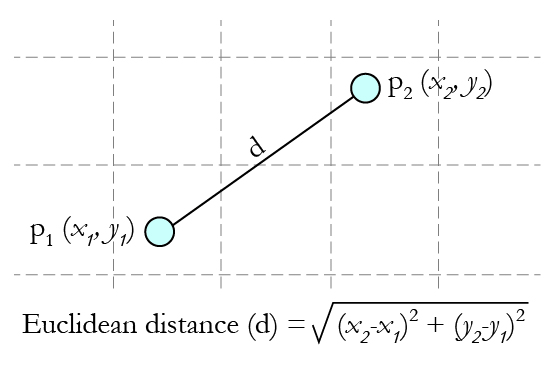

In [138]:
Image("EuclideanDistanceGraphic.jpg")
#Source: Analytics Vidya

### Make fake data 

In [139]:
data = make_classification(n_samples=200,
                           n_features=2,
                           n_classes=2,
                           n_informative=2,
                           n_redundant=0,
                            class_sep=.75,
                           random_state=5)

In [140]:
X = data[0]
y = data[1]

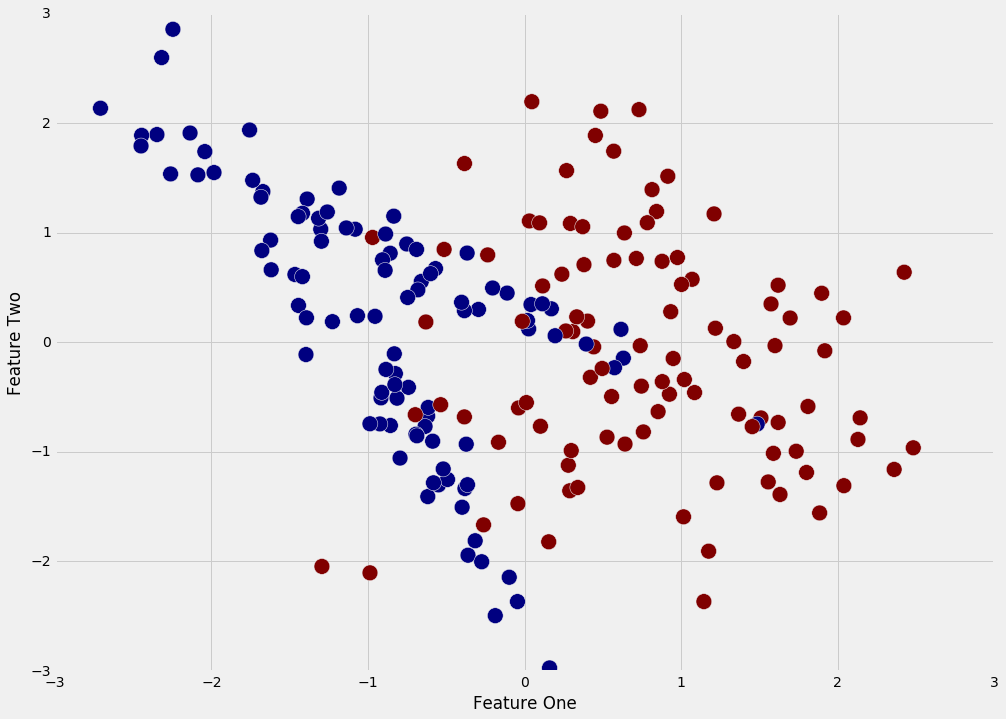

In [141]:
plt.figure(figsize=(15,11))
plt.scatter(X[:,0], X[:,1], c=y, s=250)
plt.xlabel("Feature One")
plt.ylabel("Feature Two")
plt.xlim(-3,3)
plt.ylim(-3,3);

### Train a KNN model using 3 neighbors

In [142]:
#intialize model and set n_neighbors equal to 3
knn3 = KNeighborsClassifier(n_neighbors=3)
#Fit the model on the "fake data"
knn3.fit(X,y)
#Find the accuracy score of the model on the data
score3 = float(knn3.score(X,y))
print "The model accurately labelled {:.2f} percent of the data".format(score3*100)

The model accurately labelled 93.50 percent of the data


### Now with 5 neighbors

In [143]:
#intialize model and set n_neighbors equal to 5
knn5 = KNeighborsClassifier(n_neighbors=5)
#Fit the model on the "fake data"
knn5.fit(X,y)
#Find the accuracy score of the model on the data
score5 = float(knn5.score(X,y))
print "The model accurately labelled {:.2f} percent of the data".format(score5*100)

The model accurately labelled 91.50 percent of the data


### Apply model on a new point

In [144]:
new_data = np.asarray([0.18,0.15]).reshape(1,-1)
pred3 = knn3.predict(new_data)
pred5 = knn5.predict(new_data)
print "The knn3 model thinks new_data belongs to class {}".format(pred3[0])
print "The knn5 model thinks new_data belongs to class {}".format(pred5[0])

The knn3 model thinks new_data belongs to class 1
The knn5 model thinks new_data belongs to class 0


### Visualize new point in relation to data

''

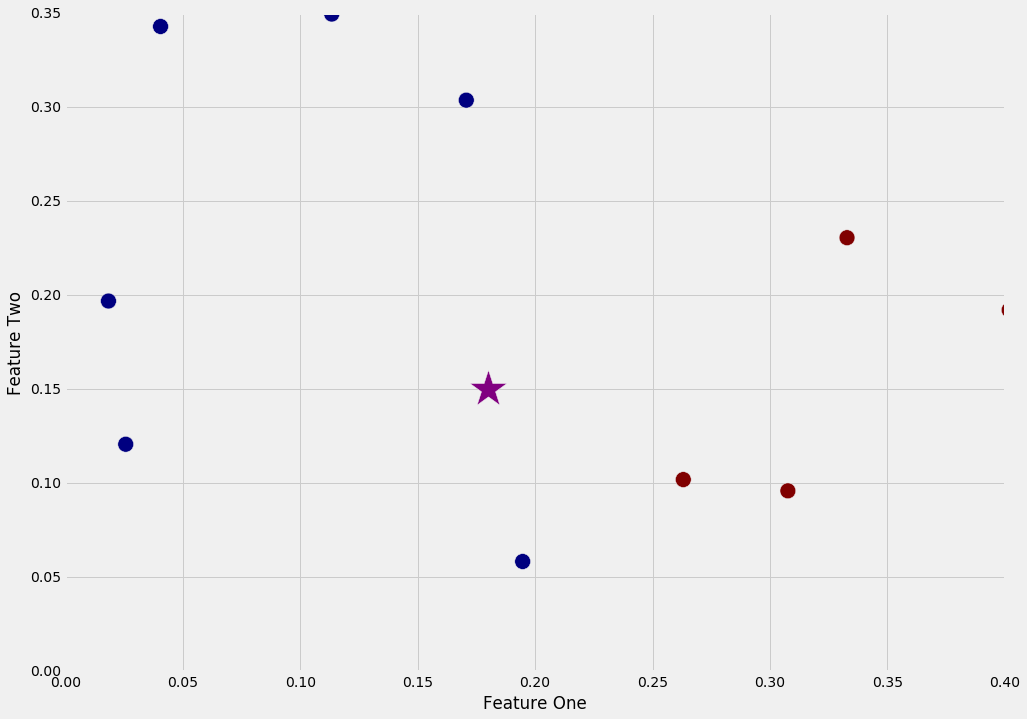

In [147]:
plt.figure(figsize=(15,11))
plt.xlim(0,0.4)
plt.ylim(0,.35)
plt.scatter(X[:,0], X[:,1], c=y, s=250)
#Plot of new_data point
plt.scatter([0.18], [0.15], c="purple",marker="*", s= 1500)
plt.xlabel("Feature One")
plt.ylabel("Feature Two")
;

## Visualizing KNN

We can see the data but can we see the model itself?

In [106]:
def plot_decision_boundary(model, X, y, n_neighbors):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks, yticks)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = ZZ >= 0.5
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y,s=40, alpha=0.4)
    plt.title("Plot of {} neighbors".format(n_neighbors))
    plt.xlabel("Feature One")
    plt.ylabel("Feature Two")

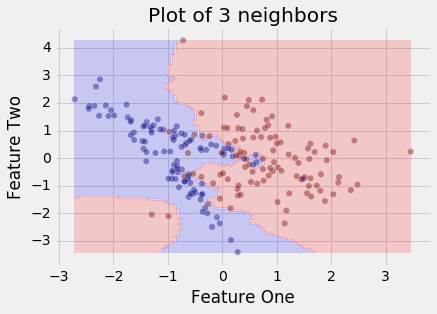

In [107]:
#Visualize the knn3 model
plot_decision_boundary(knn3, X, y, 3)

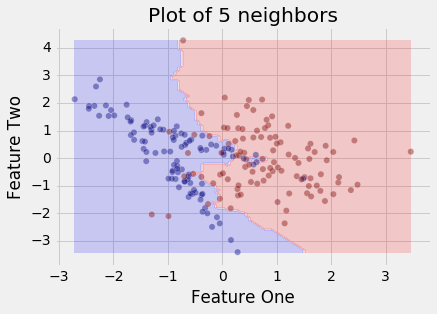

In [110]:
#Visualize the knn3 model
plot_decision_boundary(knn5, X, y, 5)

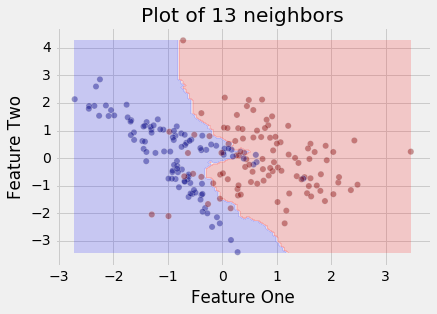

In [116]:
#Plot 7 neighbors
knn13 = KNeighborsClassifier(n_neighbors=13)
knn13.fit(X,y)
plot_decision_boundary(knn13, X, y, 13)

## Training vs testing data

    - Training data is the data used to create the model. The data that the machine learns from.
    - Testing data is the data used to evaluate the ability of the model. 
    - Any model can be used to classify data points it has seen, but the best models accurately classify foreign data.
    - The point of a machine learning model is keep it so you can repeatedly use it on new data.

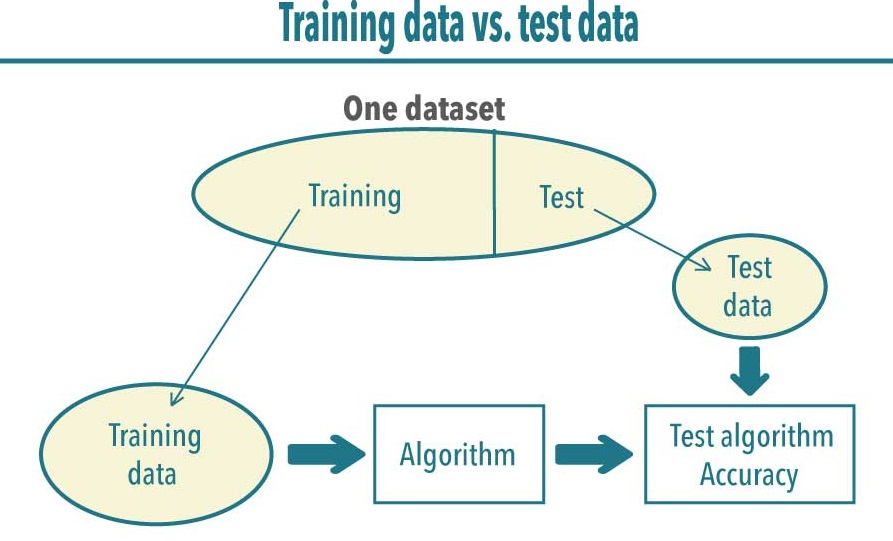

In [117]:
Image("train_test.jpg")
#Source: Nizam Muhammad Pega

### Load in Spotify data
A dataset of songs I like and dislike and their attributes from Spotify. 1 = like, 0 = dislike<br><br>



<b>Attributes:</b>

        Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
        
        Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
        
        Instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
        
        Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
        
        Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
        
More details: https://developer.spotify.com/web-api/get-audio-features/

My article using this dataset: https://opendatascience.com/blog/a-machine-learning-deep-dive-into-my-spotify-data/

In [120]:
#Load in and view subset of data
df = pd.read_pickle("songs_ML.pkl")
df.head(10)

,acousticness,danceability,instrumentalness,valence,energy,target
Mask_Off***Future,0.01020,0.833,0.021900,0.286,0.434,1
Redbone***Childish_Gambino,0.19900,0.743,0.006110,0.588,0.359,1
Xanny_Family***Future,0.03440,0.838,0.000234,0.173,0.412,1
Master_Of_None***Beach_House,0.60400,0.494,0.510000,0.230,0.338,1
Parallel_Lines***Junior_Boys,0.18000,0.678,0.512000,0.904,0.561,1
Sneakin’***Drake,0.00479,0.804,0.000000,0.264,0.560,1
Childs_Play***Drake,0.01450,0.739,0.000007,0.308,0.472,1
Gyöngyhajú_lány***Omega,0.02020,0.266,0.664000,0.393,0.348,1
I've_Seen_Footage***Death_Grips,0.04810,0.603,0.000000,0.398,0.944,1
Digital_Animal***Honey_Claws,0.00208,0.836,0.000000,0.386,0.603,1


In [122]:
df.tail(4)

,acousticness,danceability,instrumentalness,valence,energy,target
Candy***Dillon_Francis,0.08770,0.894,0.001670,0.867,0.892,0
Habit_-_Dack_Janiels_&_Wenzday_Remix***Rain_Man,0.00857,0.637,0.003990,0.470,0.935,0
First_Contact***Twin_Moons,0.00164,0.557,0.677000,0.623,0.992,0
I_Wanna_Get_Better***Bleachers,0.00281,0.446,0.000039,0.402,0.915,0


### Train KNN on the whole dataset

In [ ]:
X = df.drop("target",axis =1)
y = df.target

In [124]:
#Find the null accuracy aka the benchmark score
y.value_counts(normalize=True)

1    0.505702
0    0.494298
Name: target, dtype: float64

In [126]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)
score = float(knn.score(X,y))
print "The model accurately labelled {:.2f} percent of the data".format(score*100)

The model accurately labelled 80.66 percent of the data


### Steps:

1. Split data into training and testing sets.
2. Fit knn model with 5 neighbors on the training data.
3. Make predictions on the testing data with the trained model.
4. Compare predicted labels of the testing data to its actual labels

In [129]:
#Step 1:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33,
                                                    random_state=42)
#Step 2:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
#Step 3:
predictions = knn.predict(X_test)
#Step 4:
testing_score = accuracy_score(y_test, predictions)
# knn.score(X_test, y_test) is another way to get the accuracy score
print "The model accurately classified {:.2f} of the testing data".format(testing_score*100)

The model accurately classified 65.17 of the testing data


Noticeable drop in the score, how come?

## Plot the model scores for testing and training data for a range of neighbor values

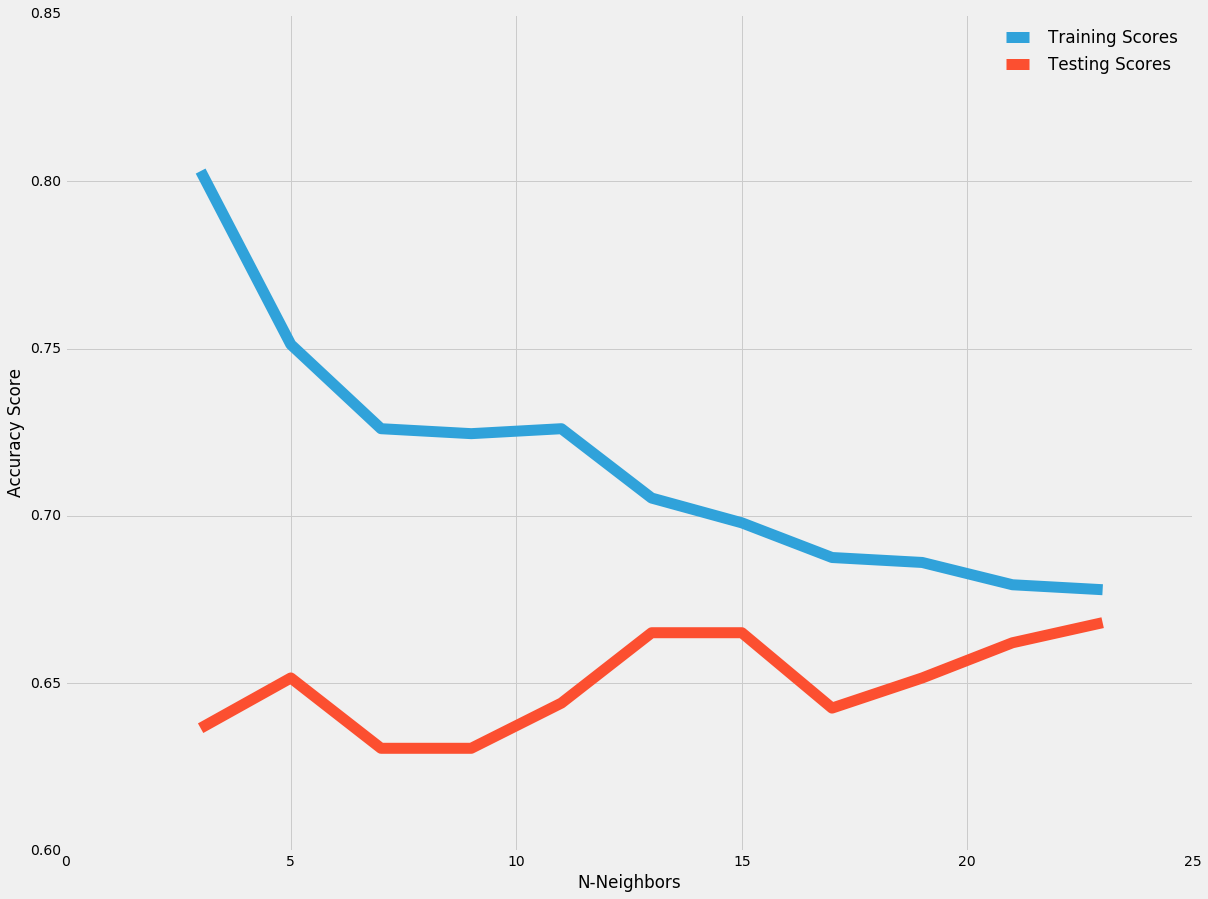

In [135]:
train_scores = []
test_scores = []
for i in range(3,25,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    trs = model.score(X_train, y_train)
    tes = model.score(X_test, y_test)
    train_scores.append(trs)
    test_scores.append(tes)
    
plt.figure(figsize=(18,14))    
plt.plot(range(3,25,2), train_scores, label= "Training Scores",linewidth= 11)
plt.plot(range(3,25,2), test_scores, label= "Testing Scores",linewidth= 11)
plt.xlabel("N-Neighbors")
plt.ylabel("Accuracy Score")
plt.legend()